<a href="https://colab.research.google.com/github/dishari-roy-7/DogsCats/blob/main/Internshala_DogCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [31]:
train_dir= '/content/drive/MyDrive/cats_and_dogs/train'
test_dir= '/content/drive/MyDrive/cats_and_dogs/test'
validation_dir= '/content/drive/MyDrive/cats_and_dogs/validation'

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150,150),
          batch_size=20,
          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


training CNN Model

In [22]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [27]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
100/100 [==============================] - 677s 7s/step - loss: 0.6875 - acc: 0.5440 - val_loss: 0.7104 - val_acc: 0.5200
Epoch 2/20
100/100 [==============================] - 92s 922ms/step - loss: 0.6574 - acc: 0.6090 - val_loss: 0.6886 - val_acc: 0.5650
Epoch 3/20
100/100 [==============================] - 92s 920ms/step - loss: 0.6085 - acc: 0.6695 - val_loss: 0.6068 - val_acc: 0.6650
Epoch 4/20
100/100 [==============================] - 92s 921ms/step - loss: 0.5676 - acc: 0.7080 - val_loss: 0.5925 - val_acc: 0.6740
Epoch 5/20
100/100 [==============================] - 92s 918ms/step - loss: 0.5398 - acc: 0.7215 - val_loss: 0.5880 - val_acc: 0.6790
Epoch 6/20
100/100 [==============================] - 91s 912ms/step - loss: 0.5119 - acc: 0.7390 - val_loss: 0.5918 - val_acc: 0.6790
Epoch 7/20
100/100 [==============================] - 92s 917ms/step - loss: 0.4957 - acc: 0.7555 - val_loss: 0.6127 - val_acc: 0.6780
Epoch 8/20
100/100 [==============================] - 91s

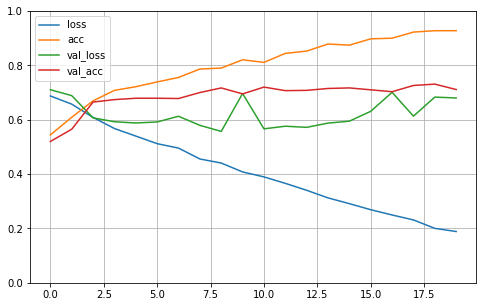

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
model.save("model.h5")

In [39]:
from tensorflow.keras import backend as K

K.clear_session()
del model